In [9]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from investor import Investor 
from collections import Counter

Відкриваю всі json файли викорустовуючи раніше імпортовану бібліотеку, яка працює з json файлами.

In [10]:
with open('/Users/sofiyamandryk/Downloads/ukraine.json', encoding="utf-8") as file:
    investor_data_u = json.load(file)
with open('/Users/sofiyamandryk/Downloads/germany.json', encoding="utf-8") as file:
    investor_data_g = json.load(file)
with open('/Users/sofiyamandryk/Downloads/poland.json', encoding="utf-8") as file:
    investor_data_p = json.load(file) 

ukraine_data = [Investor(investor) for investor in investor_data_u["result"]]
germany_data = [Investor(investor) for investor in investor_data_g["result"]]
poland_data = [Investor(investor) for investor in investor_data_p["result"]]





Використовуючи Investor, а точніше функцію extract_specialities, використовую цю функцію щоб проаналізувати скільки людей займаються якоюсь спеціальнісю, тобто який розподіл черед даних інвесторів.

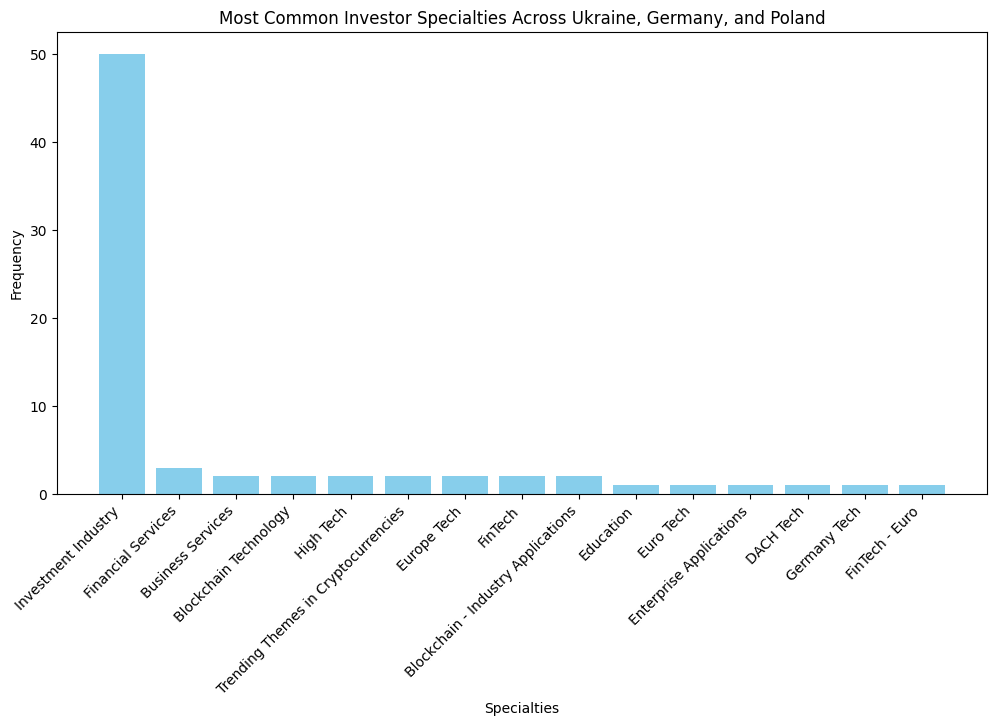

In [11]:
ukraine_investors = [Investor(investor) for investor in investor_data_u["result"]]
germany_investors = [Investor(investor) for investor in investor_data_g["result"]]
poland_investors = [Investor(investor) for investor in investor_data_p["result"]]
all_specialties = []

for inv in investor_data_u["result"] + investor_data_g["result"] + investor_data_p["result"]:
    specialties = Investor.extract_specialties(inv.get("practiceAreaList", []))
    all_specialties.extend(specialties)

specialty_counts = Counter(all_specialties)
plt.figure(figsize=(12, 6))
plt.bar(specialty_counts.keys(), specialty_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Specialties')
plt.ylabel('Frequency')
plt.title('Most Common Investor Specialties Across Ukraine, Germany, and Poland')
plt.show()


Доповнюючи клас функцією get_specialties, використовую її щоб проаналізувати які спеціальності та в якій кількості можна спостерігати у різних країних.

Тут я використала Pandas бібліотеку, бо нею зручно організувати саме ті дані якіі мені потрібно в одну таблицю, seaborn дає можливість легко створювати статистичні візуалізації, а matplotlib використовується для додаткового налаштування графіків.

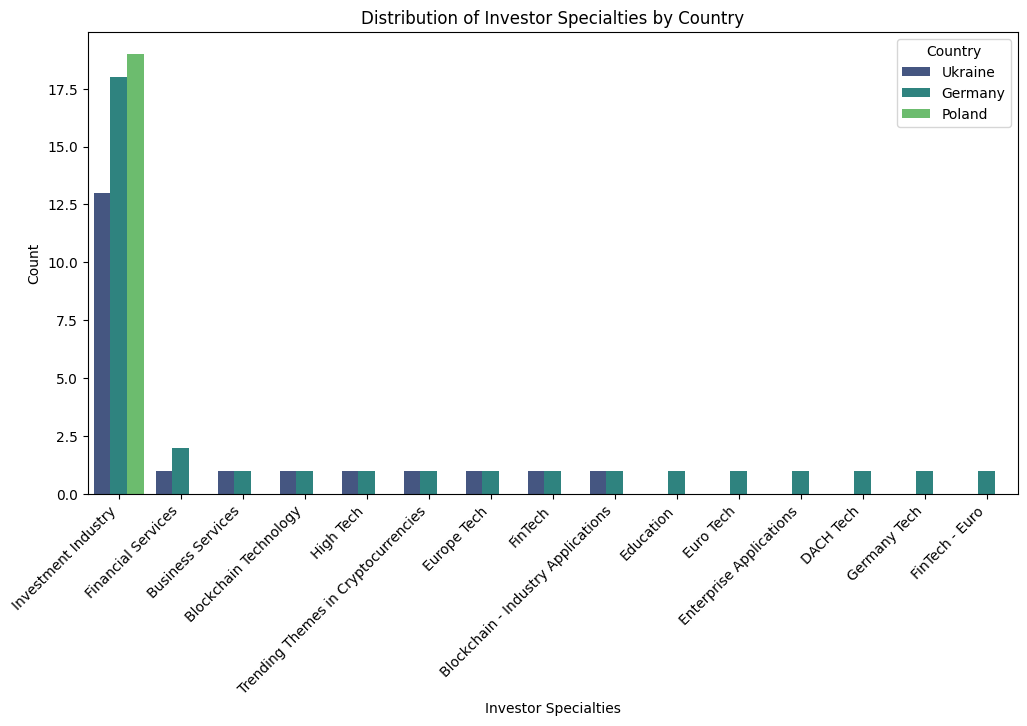

In [12]:

def get_specialties(investors, country_name):
    specialties = []
    for investor in investors:
            specialties.extend([(specialty, country_name) for specialty in investor.specialties])
    return specialties


data = get_specialties(ukraine_data, "Ukraine") + \
       get_specialties(germany_data, "Germany") + \
       get_specialties(poland_data, "Poland")
df = pd.DataFrame(data, columns=["Specialty", "Country"])
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Specialty", hue="Country", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Investor Specialties")
plt.ylabel("Count")
plt.title("Distribution of Investor Specialties by Country")
plt.legend(title="Country")




Цей код аналізує, скільки разів кожна країна зустрічається у списку investor_data_u['result'], а потім будує графік частоти зустрічання за допомогою matplotlib.

Я використала pandas, бо він дозволяє легко створювати й опрацьовувати табличні дані, полегшує роботу зі словниками (country_dict) та швидко перетворює їх у формат таблиці (DataFrame).
Я використала matplotlib, бо він забезпечує гнучку візуалізацію даних та використовується для побудови лінійного графіка залежності кількості згадок країни від її назви.

Text(0, 0.5, 'Number of times met')

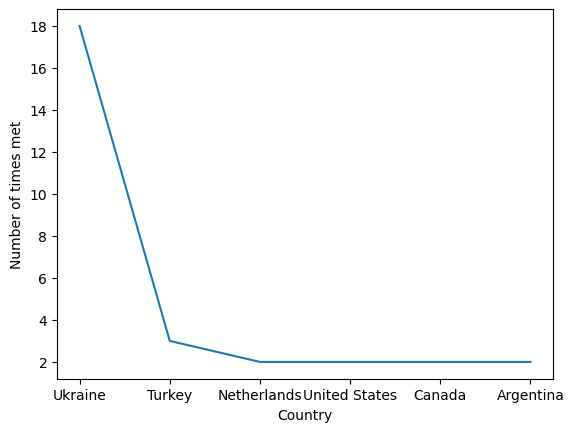

In [13]:
ukraine_country = [location['country']['name'] for x in investor_data_u['result'] for location in x.get('locations')]
country_dict = {}
for country in ukraine_country:
    if country not in country_dict:
        country_dict[country] = 1
    country_dict[country] += 1

df = pd.DataFrame({'x_axis': list(country_dict.keys()), 'y_axis': list(country_dict.values())})[:6]
plt.plot('x_axis', 'y_axis', data = df)
plt.xlabel('Country')
plt.ylabel('Number of times met')

Цей код аналізує середній рейтинг інвесторів у трьох країнах (Україна, Німеччина, Польща) та будує стовпчасту діаграму для порівняння цих значень.

Спочатку визначається функція average_rating, яка обчислює середній рейтинг для списку інвесторів. Якщо список порожній, повертається 0. В іншому випадку використовується numpy.mean, щоб обчислити середнє значення рейтингу, ігноруючи None.

Далі створюється словник avg_ratings, де ключами є назви країн, а значеннями — їхні середні рейтинги. Для кожної країни викликається функція average_rating, щоб отримати відповідне значення.

Потім будується стовпчаста діаграма за допомогою seaborn.barplot, яка відображає середні рейтинги інвесторів для кожної країни.

Встановлюються підписи осей: по осі X — назви країн, по осі Y — середній рейтинг інвесторів. Додається заголовок графіка та обмеження для осі Y у діапазоні від 0 до 100.
На кожному стовпчику відображається числове значення середнього рейтингу. Це робиться за допомогою plt.text, де значення розміщується трохи вище відповідного стовпчика для кращої читабельності.

У підсумку код дозволяє легко порівняти середній рейтинг інвесторів у різних країнах та наочно відобразити дані у вигляді графіка.

/var/folders/wc/bzwxmz451nz5tc7rfd4009lc0000gn/T/ipykernel_6103/454516325.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_ratings.keys()), y=list(avg_ratings.values()), palette="Blues")


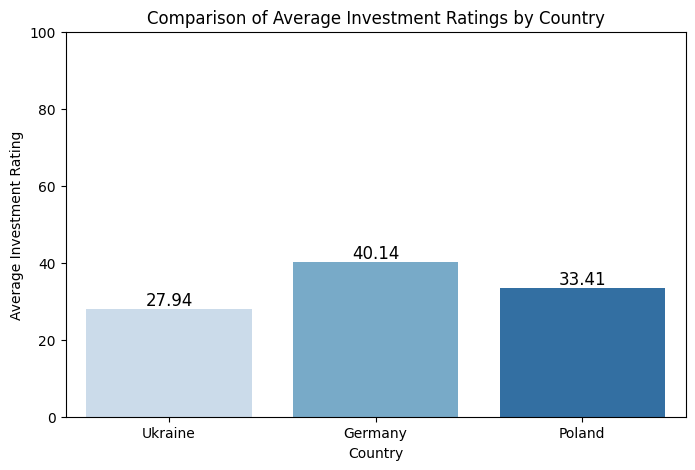

In [14]:

def average_rating(investors):
    if not investors:
        return 0
    return np.mean([inv.rating for inv in investors if inv.rating is not None])

avg_ratings = {
    "Ukraine": average_rating(ukraine_data),
    "Germany": average_rating(germany_data),
    "Poland": average_rating(poland_data)
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_ratings.keys()), y=list(avg_ratings.values()), palette="Blues")

plt.xlabel("Country")
plt.ylabel("Average Investment Rating")
plt.title("Comparison of Average Investment Ratings by Country")
plt.ylim(0, 100)

for index, value in enumerate(avg_ratings.values()):
    plt.text(index, value + 1, f"{value:.2f}", ha='center', fontsize=12)

plt.show()


Цей код будує гістограму розподілу значень ukraine_score за допомогою seaborn.histplot.
histplot використовується для візуалізації частоти появи різних значень у наборі даних. Це допомагає оцінити розподіл балів інвесторів в Україні, виявити найбільш поширені значення та можливі аномалії.

Так само для інших країн.

<Axes: ylabel='Count'>

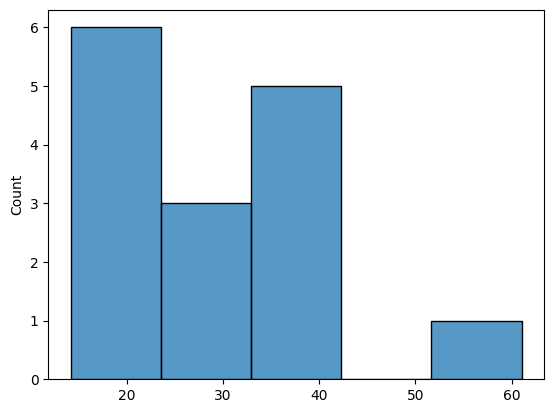

In [26]:
sns.histplot(ukraine_score)

<Axes: ylabel='Count'>

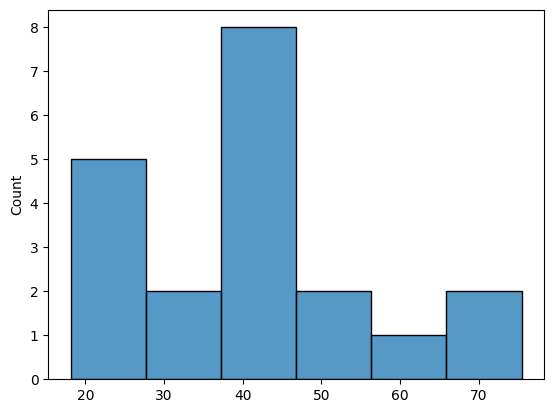

In [17]:
sns.histplot(germany_score)

<Axes: xlabel='country', ylabel='score'>

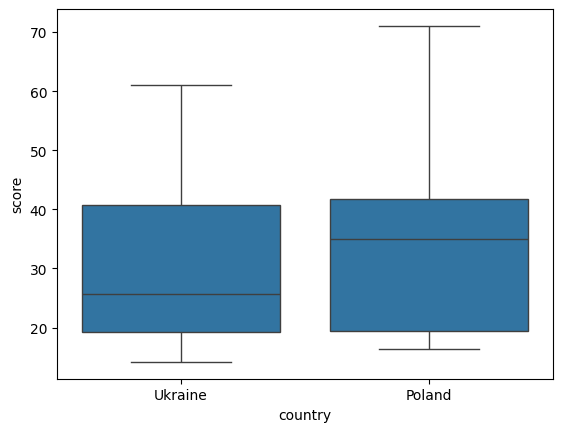

In [27]:
sns.boxplot(all_data, x='country', y = 'score')

In [33]:
print(all_data)

   score  country
0     20  Ukraine
1     30  Ukraine
2     50  Ukraine
3     40   Poland
4     10   Poland
5     50   Poland


Цей код будує кругову діаграму (pie chart), що показує відносну кількість інвесторських оцінок у двох країнах: Україні та Німеччині.

Функція plt.pie приймає список розмірностей len(ukraine_score) і len(germany_score), а також підписує сектори відповідними назвами країн. Це дозволяє порівняти, у якій країні більше зібрано оцінок інвесторів.

([<matplotlib.patches.Wedge at 0x1528b8450>,
 [Text(0.2447729506452284, 1.072420720907811, 'Ukraine'),
  Text(-0.24477260120619015, -1.0724208006649047, 'Germany')])

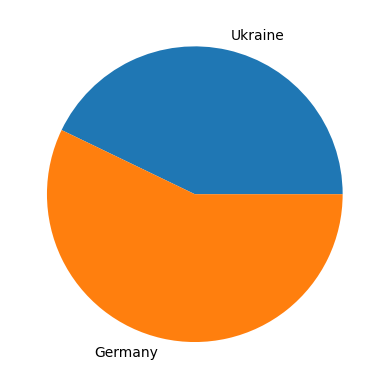

In [88]:
plt.pie([len(ukraine_score), len(germany_score)], labels=['Ukraine', 'Germany'])
# len(ukraine_score)